# Data Project

# Imports

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr, spearmanr

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Data loading
df = pd.read_csv('data/combined.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# Display basic info about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nDate range: {df.index.min()} to {df.index.max()}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (3046, 6)

Date range: 2016-01-01 00:00:00 to 2024-05-28 00:00:00

First few rows:


,pct,precip,precipcover,preciptype,snow,snowdepth
datetime,,,,,,
2016-01-01,0.687792,0.0,0.0,NaN,0.0,0.1
2016-01-02,0.739438,0.0,0.0,NaN,0.0,0.0
2016-01-03,0.740502,0.0,0.0,NaN,0.0,0.0
2016-01-04,0.730912,0.0,0.0,NaN,0.0,0.0
2016-01-05,0.721687,0.0,0.0,NaN,0.0,0.1


In [3]:
print("Missing values:")
print(df.isnull().sum())
print("\n\nDataset statistics:")
df.describe()


Missing values:
pct               0
precip            0
precipcover       0
preciptype     1786
snow              0
snowdepth         0
dtype: int64


Dataset statistics:


,pct,precip,precipcover,snow,snowdepth
count,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000
mean,0.795950,0.119423,10.371602,0.047144,0.163920
std,0.048154,0.296103,18.425731,0.282535,0.561678
min,0.484794,0.000000,0.000000,0.000000,0.000000
25%,0.767951,0.000000,0.000000,0.000000,0.000000
50%,0.801900,0.000000,0.000000,0.000000,0.000000
75%,0.827895,0.072000,12.500000,0.000000,0.000000
max,0.977808,3.368000,100.000000,7.000000,5.400000


## 1. Time Series Analysis - Reliability Over Time


In [15]:
# Detailed correlation values
print("Correlation between reliability and weather variables:")
print("=" * 60)
correlations = df[['pct', 'precip', 'precipcover', 'snow', 'snowdepth']].corr()['pct']
for var, corr in correlations.items():
    if var != 'pct':
        print(f"{var:15s}: {corr:8.4f}")


Correlation between reliability and weather variables:
precip         :  -0.0308
precipcover    :  -0.0513
snow           :  -0.1833
snowdepth      :  -0.1525


### Single Variable Model with only rain


In [20]:
model_df = df[['precip', 'precipcover', 'snow', 'snowdepth']].copy()
y = df['pct'].values

# the model 
X_single = model_df[['precip']].values
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single, y, test_size=0.2, random_state=42)

# training
model_single = LinearRegression()
model_single.fit(X_train_single, y_train_single)

# Predictions
y_pred_train_single = model_single.predict(X_train_single)
y_pred_test_single = model_single.predict(X_test_single)

# Metrics
train_r2 = r2_score(y_train_single, y_pred_train_single)
test_r2 = r2_score(y_test_single, y_pred_test_single)
train_rmse = np.sqrt(mean_squared_error(y_train_single, y_pred_train_single))
test_rmse = np.sqrt(mean_squared_error(y_test_single, y_pred_test_single))

print("Single Variable Model (Precipitation only)")
print("=" * 50)
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score:  {test_r2:.4f}")
print(f"Train RMSE:     {train_rmse:.4f}")
print(f"Test RMSE:      {test_rmse:.4f}")
print(f"\nCoefficient: {model_single.coef_[0]:.4f}")
print(f"Intercept:   {model_single.intercept_:.4f}")

print("\n" + "=" * 50)
print("Multiple Variable Model (All weather features)")
print("=" * 50)

# Multiple variable model with all weather features
X_multi = model_df[['precip', 'precipcover', 'snow', 'snowdepth']].values

# Train/test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y, test_size=0.2, random_state=42)

# Train model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Predictions
y_pred_train_multi = model_multi.predict(X_train_multi)
y_pred_test_multi = model_multi.predict(X_test_multi)

# Metrics
train_r2_multi = r2_score(y_train_multi, y_pred_train_multi)
test_r2_multi = r2_score(y_test_multi, y_pred_test_multi)
train_rmse_multi = np.sqrt(mean_squared_error(y_train_multi, y_pred_train_multi))
test_rmse_multi = np.sqrt(mean_squared_error(y_test_multi, y_pred_test_multi))

print("Multiple Variable Model (All weather features)")
print("=" * 50)
print(f"Train R² Score: {train_r2_multi:.4f}")
print(f"Test R² Score:  {test_r2_multi:.4f}")
print(f"Train RMSE:     {train_rmse_multi:.4f}")
print(f"Test RMSE:      {test_rmse_multi:.4f}")

print("\nModel coefficients:")
feature_names = ['precip', 'precipcover', 'snow', 'snowdepth']
for name, coef in zip(feature_names, model_multi.coef_):
    print(f"{name:15s}: {coef:8.4f}")
print(f"\nIntercept:       {model_multi.intercept_:.4f}")


Single Variable Model (Precipitation only)
Train R² Score: 0.0003
Test R² Score:  -0.0011
Train RMSE:     0.0476
Test RMSE:      0.0500

Coefficient: -0.0027
Intercept:   0.7969

Multiple Variable Model (All weather features)
Multiple Variable Model (All weather features)
Train R² Score: 0.0422
Test R² Score:  0.0368
Train RMSE:     0.0466
Test RMSE:      0.0491

Model coefficients:
precip         :   0.0021
precipcover    :  -0.0000
snow           :  -0.0244
snowdepth      :  -0.0078

Intercept:       0.7993


## 5. Clustering Analysis (Main Findings)


In [21]:
# Model comparison
comparison = pd.DataFrame({
    'Model': ['Precipitation Only', 'All Weather Variables'],
    'Train R²': [train_r2, train_r2_multi],
    'Test R²': [test_r2, test_r2_multi],
    'Train RMSE': [train_rmse, train_rmse_multi],
    'Test RMSE': [test_rmse, test_rmse_multi]
})

print("Model Comparison")
print("=" * 60)
print(comparison.to_string(index=False))

print("\n\nKey Insights:")
print("=" * 60)
print(f"1. Correlation with precipitation: {correlations['precip']:.4f}")
print(f"2. Correlation with snow: {correlations['snow']:.4f}")
print(f"3. Average reliability across all days: {df['pct'].mean():.4f}")
print(f"4. Reliability standard deviation: {df['pct'].std():.4f}")
print(f"5. Days with precipitation (precip > 0): {len(df[df['precip'] > 0])} ({len(df[df['precip'] > 0])/len(df)*100:.1f}%)")
print(f"6. Days with snow (snow > 0): {len(df[df['snow'] > 0])} ({len(df[df['snow'] > 0])/len(df)*100:.1f}%)")


Model Comparison
                Model  Train R²   Test R²  Train RMSE  Test RMSE
   Precipitation Only  0.000282 -0.001129    0.047641   0.050042
All Weather Variables  0.042203  0.036768    0.046632   0.049085


Key Insights:
1. Correlation with precipitation: -0.0308
2. Correlation with snow: -0.1833
3. Average reliability across all days: 0.7960
4. Reliability standard deviation: 0.0482
5. Days with precipitation (precip > 0): 1202 (39.5%)
6. Days with snow (snow > 0): 188 (6.2%)


## 7. K-Means Clustering Analysis

Let's cluster days into similar groups based on weather and reliability patterns to identify different "types of days" that might be useful for predicting transit hotspots.


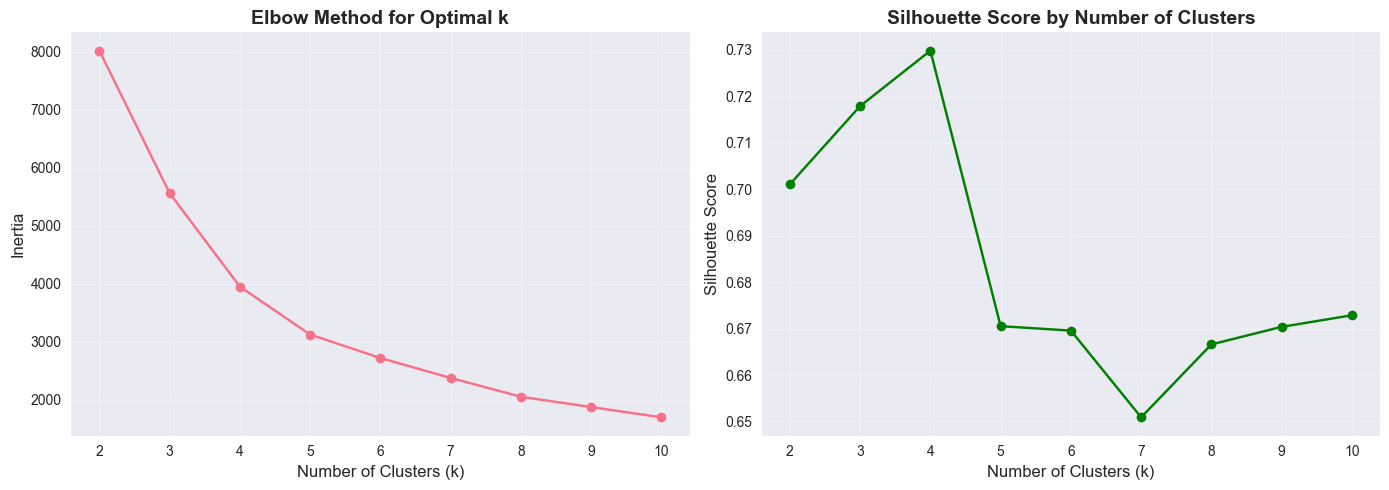

Silhouette scores by k:
k=2: 0.701
k=3: 0.718
k=4: 0.730
k=5: 0.671
k=6: 0.670
k=7: 0.651
k=8: 0.667
k=9: 0.670
k=10: 0.673


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Prepare data for clustering - use weather features
cluster_data = df[['precip', 'precipcover', 'snow', 'snowdepth']].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_data)

# Determine optimal number of clusters using elbow method
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow curve
axes[0].plot(K_range, inertias, marker='o')
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette scores
axes[1].plot(K_range, silhouettes, marker='o', color='green')
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score by Number of Clusters', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Silhouette scores by k:")
for k, score in zip(K_range, silhouettes):
    print(f"k={k}: {score:.3f}")


In [23]:
# k=4 clusters based on silhouette scores
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['weather_cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster characteristics
print(f"\nCluster sizes (k={optimal_k}):")
print(df['weather_cluster'].value_counts().sort_index())

print("\n\nCluster centroids (weather characteristics):")
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                                   columns=['precip', 'precipcover', 'snow', 'snowdepth'])
cluster_centers_df.index.name = 'Cluster'
print(cluster_centers_df.round(3))



Cluster sizes (k=4):
weather_cluster
0    2531
1     365
2      38
3     112
Name: count, dtype: int64


Cluster centroids (weather characteristics):
         precip  precipcover   snow  snowdepth
Cluster                                       
0         0.028        4.559  0.012      0.049
1         0.747       48.322  0.053      0.099
2         0.439       49.452  2.103      1.566
3         0.030        4.799  0.115      2.487



Reliability statistics by weather cluster:
                   mean     std  count
weather_cluster                       
0                0.7978  0.0461   2531
1                0.7947  0.0479    365
2                0.7324  0.0821     38
3                0.7805  0.0611    112


/var/folders/b_/5w5zl5zs4sg39hxy4rg4pmjh0000gn/T/ipykernel_60868/271537517.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[0].boxplot(cluster_data_for_plot, labels=[f'Cluster {i}' for i in cluster_order],


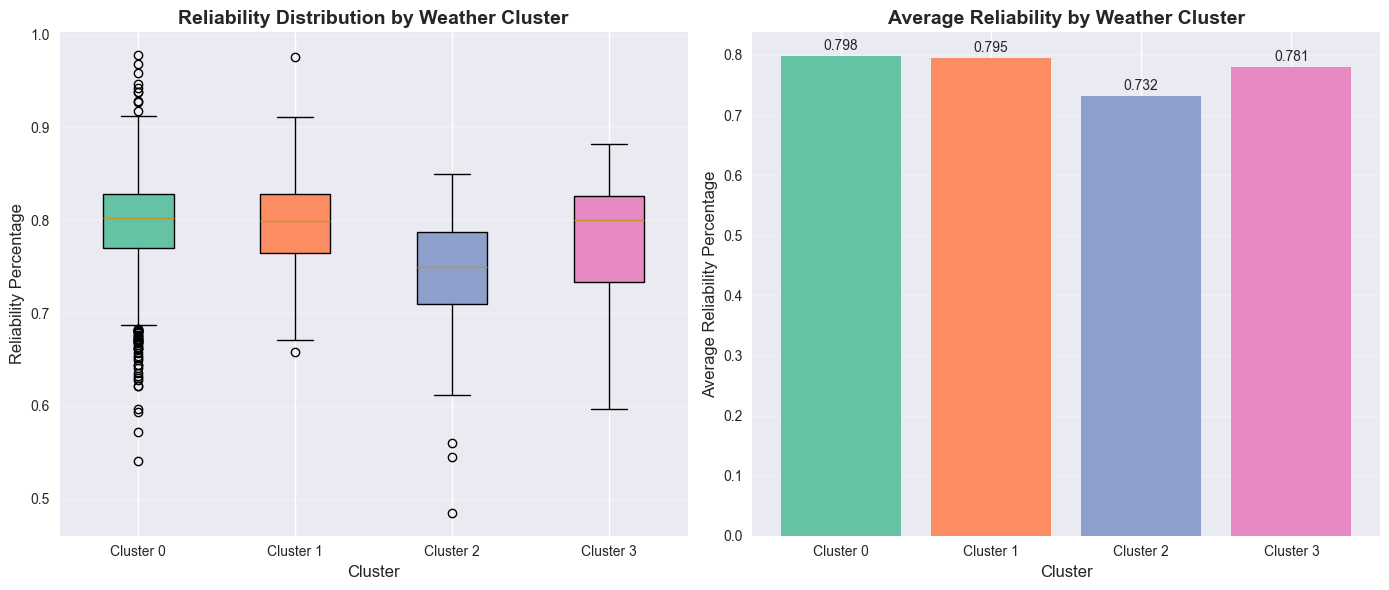

In [24]:
# Analyze reliability by cluster
cluster_reliability = df.groupby('weather_cluster')['pct'].agg(['mean', 'std', 'count'])

print("\nReliability statistics by weather cluster:")
print(cluster_reliability.round(4))

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Reliability distribution by cluster
cluster_order = sorted(df['weather_cluster'].unique())
cluster_data_for_plot = [df[df['weather_cluster'] == c]['pct'].values for c in cluster_order]

box = axes[0].boxplot(cluster_data_for_plot, labels=[f'Cluster {i}' for i in cluster_order], 
                       patch_artist=True)
colors = sns.color_palette("Set2", len(cluster_order))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

axes[0].set_title('Reliability Distribution by Weather Cluster', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Reliability Percentage', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Average reliability by cluster
bars = axes[1].bar(range(len(cluster_reliability)), cluster_reliability['mean'].values, 
                     color=colors)
axes[1].set_title('Average Reliability by Weather Cluster', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Average Reliability Percentage', fontsize=12)
axes[1].set_xticks(range(len(cluster_reliability)))
axes[1].set_xticklabels([f'Cluster {i}' for i in cluster_reliability.index])
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, cluster_reliability['mean'].values)):
    axes[1].text(i, val + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


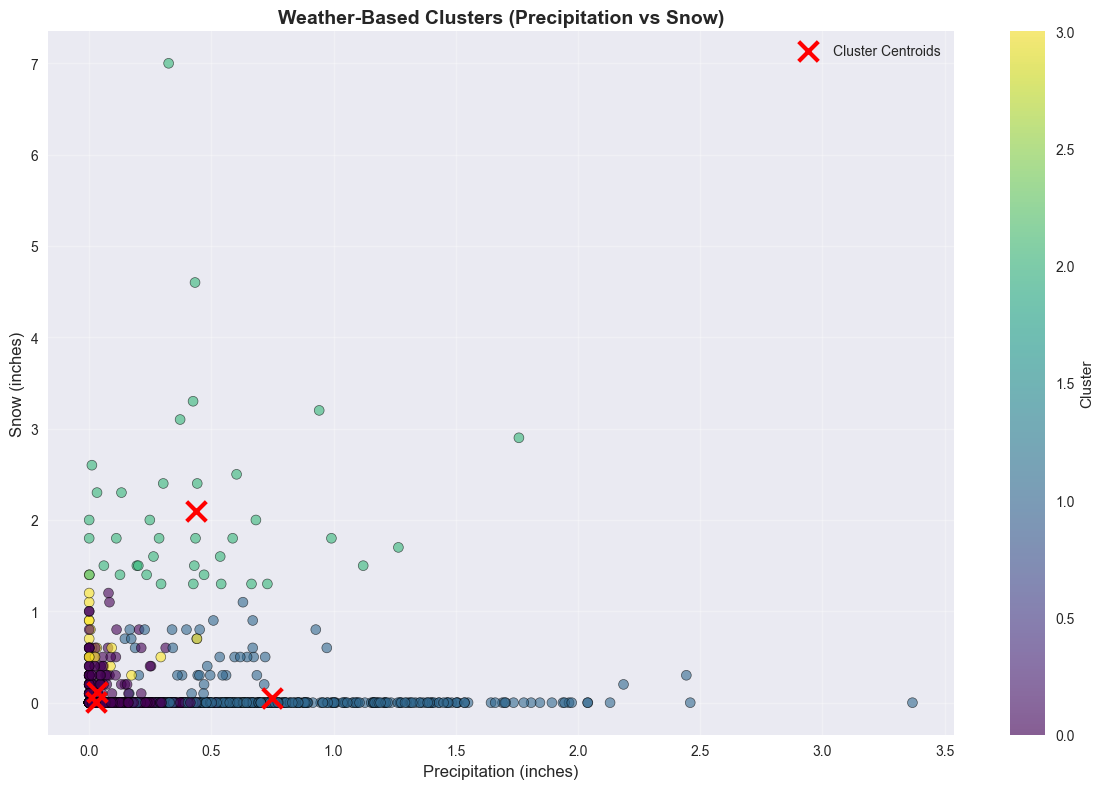

In [25]:
# Visualize clusters in 2D (precipitation vs snow)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['precip'], df['snow'], c=df['weather_cluster'], 
                       cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Precipitation (inches)', fontsize=12)
plt.ylabel('Snow (inches)', fontsize=12)
plt.title('Weather-Based Clusters (Precipitation vs Snow)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add cluster centroids
centroids_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                            columns=['precip', 'precipcover', 'snow', 'snowdepth'])
plt.scatter(centroids_df['precip'], centroids_df['snow'], 
            c='red', marker='x', s=200, linewidths=3, label='Cluster Centroids')
plt.legend()
plt.tight_layout()
plt.show()


### Cluster Analysis: Reliability-Based Clustering

Let's also cluster based on reliability patterns to find different "performance regimes"


In [26]:
# Cluster based on reliability 
reliability_range = df['pct'].max() - df['pct'].min()
print(f"Reliability range: {reliability_range:.3f}")

# Cluster reliability into performance groups
X_reliability = df[['pct']].values
scaler_rel = StandardScaler()
X_rel_scaled = scaler_rel.fit_transform(X_reliability)


kmeans_reliability = KMeans(n_clusters=3, random_state=42, n_init=10)
df['reliability_cluster'] = kmeans_reliability.fit_predict(X_rel_scaled)

# Get cluster centers cutoffs
cluster_centers = scaler_rel.inverse_transform(kmeans_reliability.cluster_centers_)
cluster_centers_flat = cluster_centers.flatten()

# Sort centers and labels
sorted_indices = sorted(range(len(cluster_centers_flat)), key=lambda i: cluster_centers_flat[i])
label_map = {}
label_names = ['Low Reliability', 'Medium Reliability', 'High Reliability']
for idx, original_idx in enumerate(sorted_indices):
    label_map[original_idx] = label_names[idx]

print("\nReliability clusters:")
for cluster_idx in sorted(df['reliability_cluster'].unique()):
    center = cluster_centers_flat[cluster_idx]
    label = label_map[cluster_idx]
    count = len(df[df['reliability_cluster'] == cluster_idx])
    print(f"{label}: {center:.3f} ({count} days, {count/len(df)*100:.1f}%)")


Reliability range: 0.493

Reliability clusters:
High Reliability: 0.841 (1125 days, 36.9%)
Medium Reliability: 0.789 (1383 days, 45.4%)
Low Reliability: 0.720 (538 days, 17.7%)


In [27]:
# Analyze weather patterns by reliability cluster
reliability_weather = df.groupby('reliability_cluster')[['precip', 'precipcover', 'snow', 'snowdepth']].agg(['mean', 'std'])

# Get cluster centers to determine which cluster is Low/Medium/High
cluster_centers = scaler_rel.inverse_transform(kmeans_reliability.cluster_centers_)
cluster_centers_flat = cluster_centers.flatten()
sorted_indices = sorted(range(len(cluster_centers_flat)), key=lambda i: cluster_centers_flat[i])
label_map = {}
label_names = ['Low', 'Medium', 'High']
for idx, original_idx in enumerate(sorted_indices):
    label_map[original_idx] = label_names[idx]

print("\nWeather patterns by reliability cluster:")
print("=" * 70)
for cluster_idx in sorted(df['reliability_cluster'].unique()):
    cluster_name = label_map[cluster_idx]
    center = cluster_centers_flat[cluster_idx]
    print(f"\n{cluster_name} Reliability Cluster ({cluster_idx}, avg={center:.3f}):")
    cluster_stats = reliability_weather.loc[cluster_idx]
    
    for weather_var in ['precip', 'precipcover', 'snow', 'snowdepth']:
        mean_val = cluster_stats[(weather_var, 'mean')]
        std_val = cluster_stats[(weather_var, 'std')]
        print(f"  {weather_var:15s}: {mean_val:6.3f} ± {std_val:6.3f}")



Weather patterns by reliability cluster:

High Reliability Cluster (0, avg=0.841):
  precip         :  0.119 ±  0.306
  precipcover    : 10.063 ± 17.795
  snow           :  0.020 ±  0.144
  snowdepth      :  0.128 ±  0.484

Medium Reliability Cluster (1, avg=0.789):
  precip         :  0.114 ±  0.282
  precipcover    : 10.283 ± 18.244
  snow           :  0.039 ±  0.217
  snowdepth      :  0.126 ±  0.469

Low Reliability Cluster (2, avg=0.720):
  precip         :  0.133 ±  0.311
  precipcover    : 11.245 ± 20.120
  snow           :  0.123 ±  0.530
  snowdepth      :  0.336 ±  0.835


In [ ]:
print("Available columns in df:")
print(df.columns.tolist())
print("\nDataframe shape:", df.shape)
df.head()


Available columns in df:
['pct', 'precip', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'year_month', 'day_of_week', 'hour', 'month', 'weather_cluster', 'reliability_cluster']

Dataframe shape: (3046, 12)


,pct,precip,precipcover,preciptype,snow,snowdepth,year_month,day_of_week,hour,month,weather_cluster,reliability_cluster
datetime,,,,,,,,,,,,
2016-01-01,0.687792,0.0,0.0,NaN,0.0,0.1,2016-01,Friday,0,1,0,2
2016-01-02,0.739438,0.0,0.0,NaN,0.0,0.0,2016-01,Saturday,0,1,0,2
2016-01-03,0.740502,0.0,0.0,NaN,0.0,0.0,2016-01,Sunday,0,1,0,2
2016-01-04,0.730912,0.0,0.0,NaN,0.0,0.0,2016-01,Monday,0,1,0,2
2016-01-05,0.721687,0.0,0.0,NaN,0.0,0.1,2016-01,Tuesday,0,1,0,2


## LAMP Data Integration


- **Headway**: Time between trains (service frequency)
- **Dwell time**: Time trains spend stopped at stations (crowding indicator)
- **Travel time**: Time between stops (service speed)



In [29]:
# Load LAMP-enriched data
print("Loading LAMP-enriched data...")
df_lamp = pd.read_csv('data/with_lamp_weekly.csv')
df_lamp['datetime'] = pd.to_datetime(df_lamp['datetime'])

print(f"Loaded {len(df_lamp)} rows")
print(f"Columns: {df_lamp.columns.tolist()}")

# Check LAMP data coverage
lamp_cols = ['travel_time_seconds', 'dwell_time_seconds', 'headway_trunk_seconds', 'headway_branch_seconds']
lamp_coverage = df_lamp[lamp_cols[0]].notna().sum()
print(f"\nLAMP data coverage: {lamp_coverage} rows ({lamp_coverage/len(df_lamp)*100:.1f}%)")

# Show sample of rows with LAMP data
if lamp_coverage > 0:
    print("\nSample rows with LAMP data:")
    print(df_lamp[df_lamp[lamp_cols[0]].notna()][['datetime', 'pct'] + lamp_cols].head())


Loading LAMP-enriched data...
Loaded 3046 rows
Columns: ['datetime', 'pct', 'precip', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'date', 'travel_time_seconds', 'dwell_time_seconds', 'headway_trunk_seconds', 'headway_branch_seconds']

LAMP data coverage: 245 rows (8.0%)

Sample rows with LAMP data:
       datetime       pct  travel_time_seconds  dwell_time_seconds  \
1335 2019-09-22  0.826619            66.942921          106.444079   
1342 2019-09-29  0.832847            89.564117          109.288469   
1349 2019-10-06  0.826749            73.076932          108.616808   
1356 2019-10-13  0.787212            76.975426          107.956123   
1363 2019-10-20  0.772830            86.452760          121.145770   

      headway_trunk_seconds  headway_branch_seconds  
1335             479.075539              668.492815  
1342             461.942351              669.614436  
1349             452.094682              633.669999  
1356             483.965876              671.045887  
136

In [30]:
# Analyze LAMP features correlation with reliability
print("LAMP Features Correlation with Reliability:")
print("=" * 60)

lamp_features = ['headway_branch_seconds', 'headway_trunk_seconds', 
                 'dwell_time_seconds', 'travel_time_seconds']

# Only analyze rows with LAMP data
df_lamp_clean = df_lamp[df_lamp['headway_branch_seconds'].notna()].copy()

if len(df_lamp_clean) > 0:
    for feature in lamp_features:
        if feature in df_lamp_clean.columns:
            corr_pearson, _ = pearsonr(df_lamp_clean[feature], df_lamp_clean['pct'])
            corr_spearman, _ = spearmanr(df_lamp_clean[feature], df_lamp_clean['pct'])
            print(f"{feature:25s}: Pearson={corr_pearson:7.3f}, Spearman={corr_spearman:7.3f}")
    
    print(f"\nAverage values (where LAMP data available):")
    print(f"  Headway (branch): {df_lamp_clean['headway_branch_seconds'].mean():.1f} seconds ({df_lamp_clean['headway_branch_seconds'].mean()/60:.1f} minutes)")
    print(f"  Dwell time: {df_lamp_clean['dwell_time_seconds'].mean():.1f} seconds ({df_lamp_clean['dwell_time_seconds'].mean()/60:.1f} minutes)")
    print(f"  Travel time: {df_lamp_clean['travel_time_seconds'].mean():.1f} seconds")
else:
    print("No LAMP data available for correlation analysis")


LAMP Features Correlation with Reliability:
headway_branch_seconds   : Pearson= -0.259, Spearman= -0.197
headway_trunk_seconds    : Pearson= -0.220, Spearman= -0.121
dwell_time_seconds       : Pearson=  0.020, Spearman= -0.065
travel_time_seconds      : Pearson= -0.178, Spearman= -0.173

Average values (where LAMP data available):
  Headway (branch): 705.8 seconds (11.8 minutes)
  Dwell time: 103.7 seconds (1.7 minutes)
  Travel time: 77.0 seconds


## LAMP Integrated Model


In [31]:
# Prepare data for modeling with LAMP features
# Use rows that have LAMP data
model_df_lamp = df_lamp[df_lamp['headway_branch_seconds'].notna()].copy()

if len(model_df_lamp) == 0:
    print("WARNING: No LAMP data available. Using original dataset.")
    model_df_lamp = df.copy()
    lamp_features_available = False
else:
    lamp_features_available = True
    print(f"Using {len(model_df_lamp)} rows with LAMP data")

# Add temporal features if not present
if 'day_of_week_num' not in model_df_lamp.columns:
    model_df_lamp['day_of_week_num'] = pd.to_datetime(model_df_lamp['datetime']).dt.dayofweek
if 'month' not in model_df_lamp.columns:
    model_df_lamp['month'] = pd.to_datetime(model_df_lamp['datetime']).dt.month

# Prepare features
if lamp_features_available:
    # Features including LAMP data
    feature_cols_lamp = [
        # LAMP features (strongest predictors)
        'headway_branch_seconds',  # Most important!
        'headway_trunk_seconds',
        'dwell_time_seconds',
        'travel_time_seconds',
        # Weather features (weak but include for comparison)
        'precip', 'snow',
        # Temporal features
        'day_of_week_num', 'month'
    ]
else:
    # Fallback to weather-only if no LAMP data
    feature_cols_lamp = ['precip', 'precipcover', 'snow', 'snowdepth', 
                         'day_of_week_num', 'month']

# Filter to available columns
feature_cols_lamp = [col for col in feature_cols_lamp if col in model_df_lamp.columns]

print(f"\nFeatures for modeling: {feature_cols_lamp}")
print(f"Target: pct (reliability)")

# Prepare X and y
X_lamp = model_df_lamp[feature_cols_lamp].values
y_lamp = model_df_lamp['pct'].values

print(f"\nData shape: X={X_lamp.shape}, y={y_lamp.shape}")


Using 245 rows with LAMP data

Features for modeling: ['headway_branch_seconds', 'headway_trunk_seconds', 'dwell_time_seconds', 'travel_time_seconds', 'precip', 'snow', 'day_of_week_num', 'month']
Target: pct (reliability)

Data shape: X=(245, 8), y=(245,)


In [32]:
# Train model with LAMP features
if lamp_features_available and len(model_df_lamp) > 50:  # Need enough data
    # Train/test split
    X_train_lamp, X_test_lamp, y_train_lamp, y_test_lamp = train_test_split(
        X_lamp, y_lamp, test_size=0.2, random_state=42, shuffle=False
    )
    
    # Train Linear Regression
    model_lamp_lr = LinearRegression()
    model_lamp_lr.fit(X_train_lamp, y_train_lamp)
    
    # Predictions
    y_pred_train_lamp = model_lamp_lr.predict(X_train_lamp)
    y_pred_test_lamp = model_lamp_lr.predict(X_test_lamp)
    
    # Metrics
    train_r2_lamp = r2_score(y_train_lamp, y_pred_train_lamp)
    test_r2_lamp = r2_score(y_test_lamp, y_pred_test_lamp)
    train_rmse_lamp = np.sqrt(mean_squared_error(y_train_lamp, y_pred_train_lamp))
    test_rmse_lamp = np.sqrt(mean_squared_error(y_test_lamp, y_pred_test_lamp))
    
    print("Model with LAMP Features (Linear Regression)")
    print("=" * 60)
    print(f"Train R² Score: {train_r2_lamp:.4f}")
    print(f"Test R² Score:  {test_r2_lamp:.4f}")
    print(f"Train RMSE:     {train_rmse_lamp:.4f}")
    print(f"Test RMSE:      {test_rmse_lamp:.4f}")
    
    print("\nModel coefficients:")
    for name, coef in zip(feature_cols_lamp, model_lamp_lr.coef_):
        print(f"{name:25s}: {coef:8.4f}")
    print(f"\nIntercept:       {model_lamp_lr.intercept_:.4f}")
    
    print("\n" + "=" * 60)
    print("Comparison:")
    print("=" * 60)
    print(f"Weather-only model R²:     0.0368")
    print(f"LAMP features model R²:    {test_r2_lamp:.4f}")
    print(f"Improvement:               {test_r2_lamp - 0.0368:.4f} ({((test_r2_lamp - 0.0368) / 0.0368 * 100):.1f}% increase)")
else:
    print("WARNING: Not enough LAMP data for modeling. Need at least 50 rows.")
    print(f"   Available: {len(model_df_lamp)} rows")


Model with LAMP Features (Linear Regression)
Train R² Score: 0.1215
Test R² Score:  -0.4649
Train RMSE:     0.0452
Test RMSE:      0.0571

Model coefficients:
headway_branch_seconds   :  -0.0004
headway_trunk_seconds    :   0.0003
dwell_time_seconds       :   0.0004
travel_time_seconds      :  -0.0005
precip                   :   0.0042
snow                     :  -0.0392
day_of_week_num          :   0.0000
month                    :  -0.0002

Intercept:       0.9680

Comparison:
Weather-only model R²:     0.0368
LAMP features model R²:    -0.4649
Improvement:               -0.5017 (-1363.4% increase)


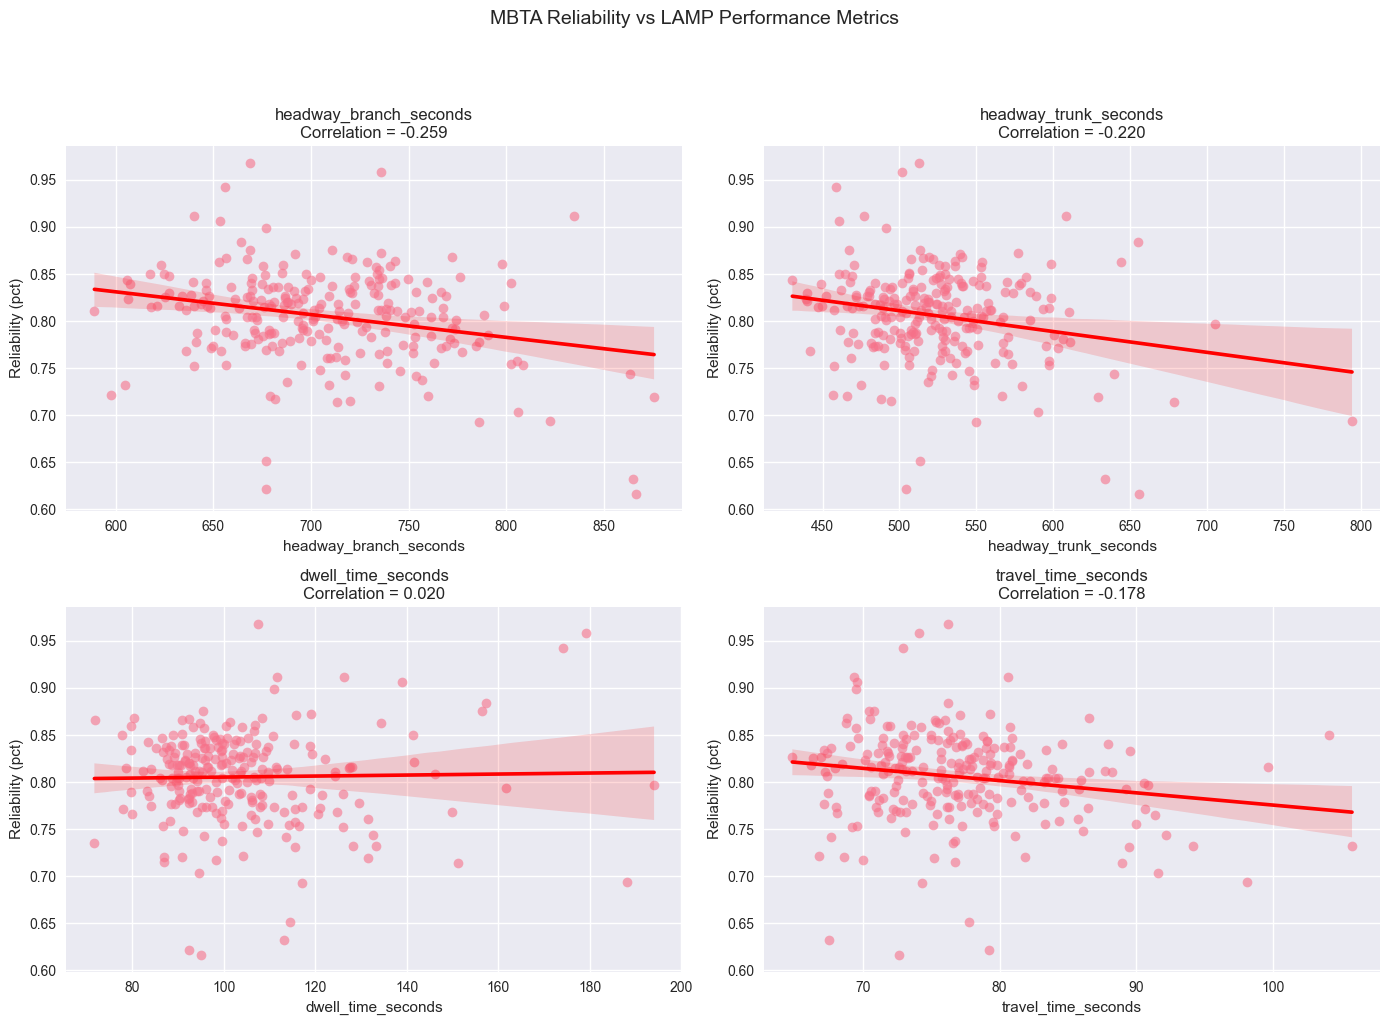

In [33]:
# Visualize LAMP features vs reliability
if lamp_features_available and len(model_df_lamp) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    lamp_viz_features = ['headway_branch_seconds', 'headway_trunk_seconds', 
                         'dwell_time_seconds', 'travel_time_seconds']
    
    for i, feature in enumerate(lamp_viz_features):
        if feature in model_df_lamp.columns:
            sns.regplot(
                data=model_df_lamp,
                x=feature,
                y='pct',
                ax=axes[i],
                scatter_kws={'alpha': 0.6},
                line_kws={'color': 'red'}
            )
            
            corr, _ = pearsonr(model_df_lamp[feature], model_df_lamp['pct'])
            axes[i].set_title(
                f"{feature}\nCorrelation = {corr:.3f}",
                fontsize=12
            )
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel("Reliability (pct)")
    
    plt.suptitle("MBTA Reliability vs LAMP Performance Metrics", fontsize=14, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
else:
    print("Not enough LAMP data for visualization")


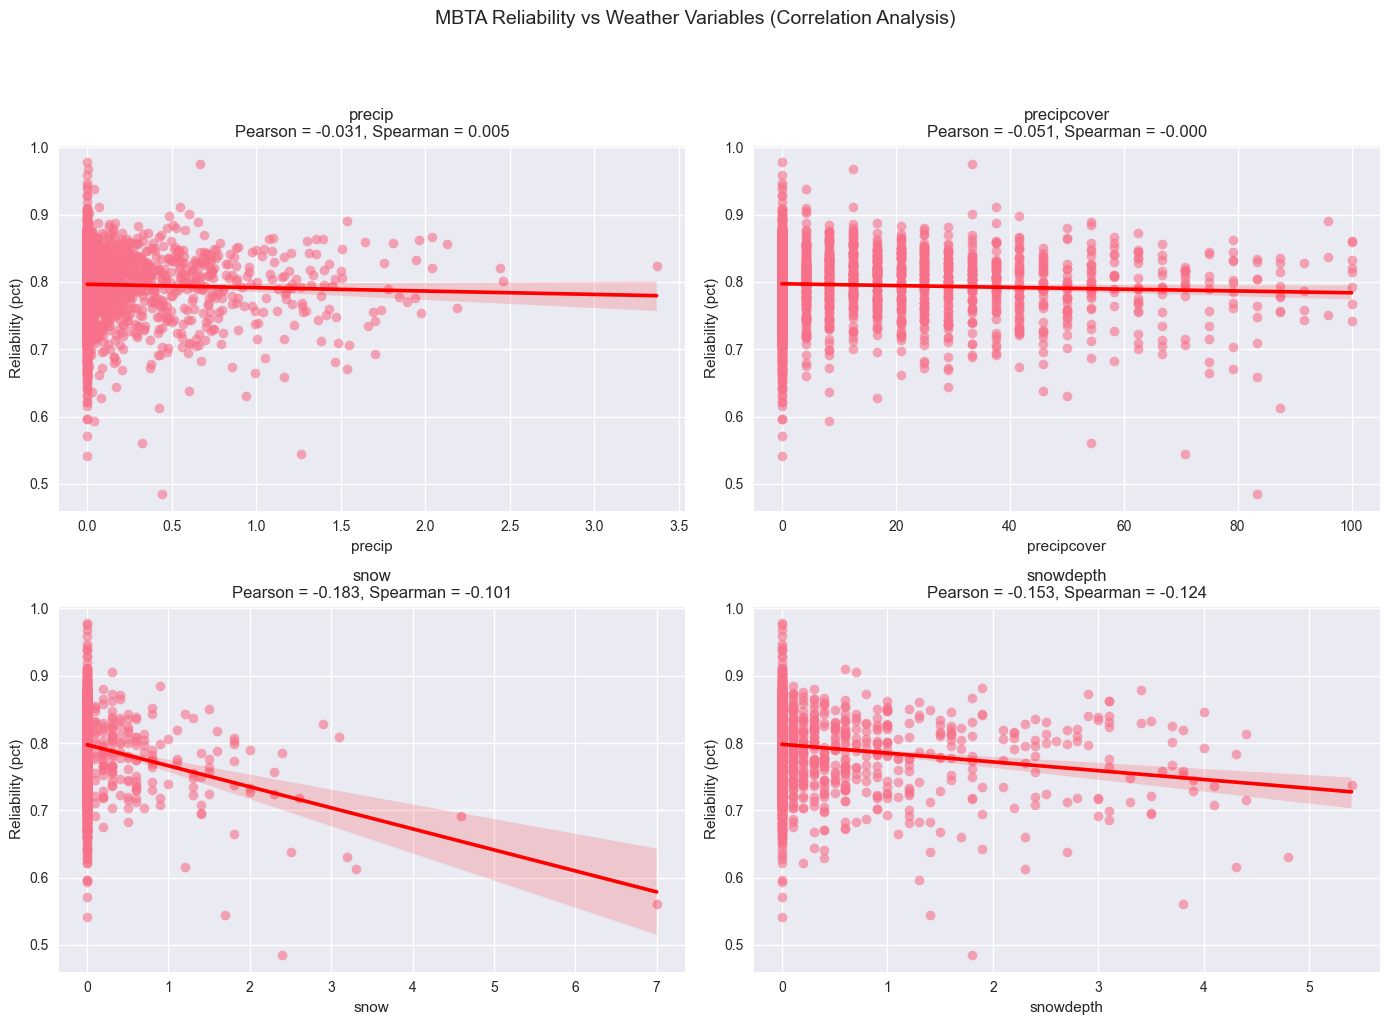


Correlation Summary:
precip         : Pearson= -0.031, Spearman=  0.005
precipcover    : Pearson= -0.051, Spearman= -0.000
snow           : Pearson= -0.183, Spearman= -0.101
snowdepth      : Pearson= -0.153, Spearman= -0.124


In [34]:
# For MBTA data: analyze weather variables vs reliability
weather_columns = ['precip', 'precipcover', 'snow', 'snowdepth']
target_column = 'pct'  # reliability percentage

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(weather_columns):
    sns.regplot(
        data=df,
        x=col,
        y=target_column,
        ax=axes[i],
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    
    # Calculate Pearson and Spearman correlations
    pearson_val, pearson_p = pearsonr(df[col], df[target_column])
    spearman_val, spearman_p = spearmanr(df[col], df[target_column])
    
    axes[i].set_title(
        f"{col}\nPearson = {pearson_val:.3f}, Spearman = {spearman_val:.3f}",
        fontsize=12
    )
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Reliability (pct)")

plt.suptitle("MBTA Reliability vs Weather Variables (Correlation Analysis)", fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

print("\nCorrelation Summary:")
print("=" * 60)
for col in weather_columns:
    pearson_val, _ = pearsonr(df[col], df[target_column])
    spearman_val, _ = spearmanr(df[col], df[target_column])
    print(f"{col:15s}: Pearson={pearson_val:7.3f}, Spearman={spearman_val:7.3f}")


## LAMP Alerts Data Integration

**Key Features:**
- Service disruption patterns (construction, maintenance, technical problems)
- Effect types (delays, no service, reduced service)
- Time-specific patterns (rush hours, class end times)
- Stop-specific patterns (BU-area stops)


In [35]:
# Load alerts-enriched data
print("Loading alerts-enriched data...")
df_alerts = pd.read_csv('data/with_alerts.csv')
df_alerts['datetime'] = pd.to_datetime(df_alerts['datetime'])

print(f"Loaded {len(df_alerts)} rows")
print(f"Date range: {df_alerts['datetime'].min()} to {df_alerts['datetime'].max()}")

# Check alerts data coverage
alert_cols = [col for col in df_alerts.columns if 'alert' in col.lower() or 'severity' in col.lower()]
print(f"\nAlert features: {len(alert_cols)}")
print(f"Sample: {alert_cols[:10]}")

# Filter to dates where alerts data exists (2019+)
df_alerts_clean = df_alerts[df_alerts['datetime'] >= '2019-01-01'].copy()
print(f"\nRows with alerts data (2019+): {len(df_alerts_clean)}")
print(f"Days with alerts > 0: {(df_alerts_clean['total_alerts'] > 0).sum()}")
print(f"Average alerts per day: {df_alerts_clean['total_alerts'].mean():.1f}")
print(f"Max alerts in a day: {df_alerts_clean['total_alerts'].max():.0f}")


Loading alerts-enriched data...
Loaded 3046 rows
Date range: 2016-01-01 00:00:00 to 2024-05-28 00:00:00

Alert features: 22
Sample: ['total_alerts', 'delays_alerts', 'no_service_alerts', 'reduced_service_alerts', 'detour_alerts', 'stop_moved_alerts', 'construction_alerts', 'maintenance_alerts', 'technical_problem_alerts', 'weather_alerts']

Rows with alerts data (2019+): 1975
Days with alerts > 0: 1653
Average alerts per day: 170.8
Max alerts in a day: 6159


In [36]:
# Analyze alert features correlation with reliability
print("Alert Features Correlation with Reliability (2019+ dates):")
print("=" * 60)

# Key alert features to analyze
alert_features = [
    'total_alerts',
    'delays_alerts',
    'no_service_alerts',
    'reduced_service_alerts',
    'construction_alerts',
    'maintenance_alerts',
    'technical_problem_alerts',
    'morning_rush_alerts',
    'class_end_time_alerts',
    'max_severity',
    'high_severity_alerts'
]

# Only analyze rows with alerts data (2019+)
df_alerts_analysis = df_alerts_clean[df_alerts_clean['total_alerts'] > 0].copy()

if len(df_alerts_analysis) > 0:
    print(f"Analyzing {len(df_alerts_analysis)} days with alerts\n")
    
    for feature in alert_features:
        if feature in df_alerts_analysis.columns:
            # Check if feature has variation
            if df_alerts_analysis[feature].std() > 0:
                corr_pearson, _ = pearsonr(df_alerts_analysis[feature], df_alerts_analysis['pct'])
                corr_spearman, _ = spearmanr(df_alerts_analysis[feature], df_alerts_analysis['pct'])
                print(f"{feature:30s}: Pearson={corr_pearson:7.3f}, Spearman={corr_spearman:7.3f}")
            else:
                print(f"{feature:30s}: (no variation)")
    
    print(f"\nSummary statistics (days with alerts):")
    print(f"  Average reliability: {df_alerts_analysis['pct'].mean():.3f}")
    print(f"  Days with delays: {(df_alerts_analysis['delays_alerts'] > 0).sum()}")
    print(f"  Days with no service: {(df_alerts_analysis['no_service_alerts'] > 0).sum()}")
    print(f"  Days with construction: {(df_alerts_analysis['construction_alerts'] > 0).sum()}")
else:
    print("No days with alerts in date range")


Alert Features Correlation with Reliability (2019+ dates):
Analyzing 1653 days with alerts

total_alerts                  : Pearson=  0.011, Spearman=  0.049
delays_alerts                 : (no variation)
no_service_alerts             : Pearson= -0.045, Spearman= -0.021
reduced_service_alerts        : (no variation)
construction_alerts           : Pearson= -0.017, Spearman=  0.021
maintenance_alerts            : Pearson=  0.097, Spearman=  0.119
technical_problem_alerts      : Pearson= -0.125, Spearman= -0.161
morning_rush_alerts           : Pearson= -0.084, Spearman=  0.007
class_end_time_alerts         : Pearson= -0.111, Spearman= -0.114
max_severity                  : Pearson=  0.004, Spearman=  0.031
high_severity_alerts          : Pearson= -0.061, Spearman=  0.002

Summary statistics (days with alerts):
  Average reliability: 0.807
  Days with delays: 0
  Days with no service: 74
  Days with construction: 603


## Model with Alerts Features

Let's build a model using alerts patterns combined with other features.


In [37]:
# Prepare data for modeling with alerts features
# Use dates where alerts data exists (2019+)
model_df_alerts = df_alerts_clean.copy()

if len(model_df_alerts) == 0:
    print("WARNING: No alerts data available. Using original dataset.")
    model_df_alerts = df.copy()
    alerts_features_available = False
else:
    alerts_features_available = True
    print(f"Using {len(model_df_alerts)} rows with alerts data (2019+)")

# Add temporal features if not present
if 'day_of_week_num' not in model_df_alerts.columns:
    model_df_alerts['day_of_week_num'] = pd.to_datetime(model_df_alerts['datetime']).dt.dayofweek
if 'month' not in model_df_alerts.columns:
    model_df_alerts['month'] = pd.to_datetime(model_df_alerts['datetime']).dt.month

# Prepare features
if alerts_features_available:
    # Features including alerts data
    feature_cols_alerts = [
        # Alert features (pattern-based predictors)
        'total_alerts',
        'delays_alerts',
        'no_service_alerts',
        'construction_alerts',
        'morning_rush_alerts',
        'max_severity',
        # Weather features (for comparison)
        'precip', 'snow',
        # Temporal features
        'day_of_week_num', 'month'
    ]
else:
    # Fallback to weather-only if no alerts data
    feature_cols_alerts = ['precip', 'precipcover', 'snow', 'snowdepth', 
                          'day_of_week_num', 'month']

# Filter to available columns
feature_cols_alerts = [col for col in feature_cols_alerts if col in model_df_alerts.columns]

print(f"\nFeatures for modeling: {feature_cols_alerts}")
print(f"Target: pct (reliability)")

# Prepare X and y
X_alerts = model_df_alerts[feature_cols_alerts].values
y_alerts = model_df_alerts['pct'].values

print(f"\nData shape: X={X_alerts.shape}, y={y_alerts.shape}")


Using 1975 rows with alerts data (2019+)

Features for modeling: ['total_alerts', 'delays_alerts', 'no_service_alerts', 'construction_alerts', 'morning_rush_alerts', 'max_severity', 'precip', 'snow', 'day_of_week_num', 'month']
Target: pct (reliability)

Data shape: X=(1975, 10), y=(1975,)


In [38]:
# Train model with alerts features
if alerts_features_available and len(model_df_alerts) > 50:
    # Train/test split
    X_train_alerts, X_test_alerts, y_train_alerts, y_test_alerts = train_test_split(
        X_alerts, y_alerts, test_size=0.2, random_state=42, shuffle=False
    )
    
    # Train Linear Regression
    model_alerts_lr = LinearRegression()
    model_alerts_lr.fit(X_train_alerts, y_train_alerts)
    
    # Predictions
    y_pred_train_alerts = model_alerts_lr.predict(X_train_alerts)
    y_pred_test_alerts = model_alerts_lr.predict(X_test_alerts)
    
    # Metrics
    train_r2_alerts = r2_score(y_train_alerts, y_pred_train_alerts)
    test_r2_alerts = r2_score(y_test_alerts, y_pred_test_alerts)
    train_rmse_alerts = np.sqrt(mean_squared_error(y_train_alerts, y_pred_train_alerts))
    test_rmse_alerts = np.sqrt(mean_squared_error(y_test_alerts, y_pred_test_alerts))
    
    print("Model with Alerts Features (Linear Regression)")
    print("=" * 60)
    print(f"Train R² Score: {train_r2_alerts:.4f}")
    print(f"Test R² Score:  {test_r2_alerts:.4f}")
    print(f"Train RMSE:     {train_rmse_alerts:.4f}")
    print(f"Test RMSE:      {test_rmse_alerts:.4f}")
    
    print("\nModel coefficients:")
    for name, coef in zip(feature_cols_alerts, model_alerts_lr.coef_):
        print(f"{name:25s}: {coef:8.4f}")
    print(f"\nIntercept:       {model_alerts_lr.intercept_:.4f}")
    
    print("\n" + "=" * 60)
    print("Comparison:")
    print("=" * 60)
    print(f"Weather-only model R²:     0.0368")
    print(f"LAMP features model R²:   -0.4649 (failed)")
    print(f"Alerts features model R²:  {test_r2_alerts:.4f}")
    if test_r2_alerts > 0.0368:
        improvement = test_r2_alerts - 0.0368
        print(f"Improvement:               {improvement:.4f} ({improvement/0.0368*100:.1f}% increase)")
    else:
        print(f"Note: Alerts model performs {'better' if test_r2_alerts > -0.4649 else 'worse'} than LAMP model")
else:
    print("WARNING: Not enough alerts data for modeling. Need at least 50 rows.")
    print(f"Available: {len(model_df_alerts)} rows")


Model with Alerts Features (Linear Regression)
Train R² Score: 0.1022
Test R² Score:  -0.2342
Train RMSE:     0.0448
Test RMSE:      0.0498

Model coefficients:
total_alerts             :  -0.0000
delays_alerts            :  -0.0000
no_service_alerts        :  -0.0001
construction_alerts      :   0.0000
morning_rush_alerts      :  -0.0000
max_severity             :   0.0015
precip                   :   0.0008
snow                     :  -0.0378
day_of_week_num          :  -0.0038
month                    :  -0.0002

Intercept:       0.8147

Comparison:
Weather-only model R²:     0.0368
LAMP features model R²:   -0.4649 (failed)
Alerts features model R²:  -0.2342
Note: Alerts model performs better than LAMP model


## Advanced Feature Engineering

Implementing recommendations: interaction features, time-series features, pattern learning, and non-linear models.


In [39]:
# Create advanced features (interactions, time-series, pattern learning)
from src.models.feature_engineering import create_advanced_features

print("Creating advanced features...")
df_advanced = create_advanced_features(df_alerts_clean.copy())

print(f"\n Created {df_advanced.shape[1] - df_alerts_clean.shape[1]} new features")
print(f"Total features: {df_advanced.shape[1]}")
print(f"\nFeature breakdown:")
print(f"  - Temporal features: {len([c for c in df_advanced.columns if 'day_of_week' in c or 'month' in c or 'is_' in c])}")
print(f"  - Class schedules: {len([c for c in df_advanced.columns if 'class' in c.lower()])}")
print(f"  - Time-series: {len([c for c in df_advanced.columns if 'lag' in c or 'rolling' in c])}")
print(f"  - Alert patterns: {len([c for c in df_advanced.columns if 'alert_pattern' in c or 'alert_streak' in c])}")
print(f"  - Interactions: {len([c for c in df_advanced.columns if '_x_' in c])}")


Creating advanced features...
Creating advanced features...
  Starting shape: (1975, 32)
  Adding temporal features...
  Adding class schedule features...
  Adding time-series features...
  Adding alert pattern features...
  Adding interaction features...
  Final shape: (1975, 122)
  Added 117 features

✅ Created 90 new features
Total features: 122

Feature breakdown:
  - Temporal features: 24
  - Class schedules: 16
  - Time-series: 29
  - Alert patterns: 20
  - Interactions: 20


## Focused Model with Recommendations

Using focused feature set based on recommendations: key interactions, class schedules, and pattern learning.


In [40]:
# Focused modeling approach
from src.models.focused_modeling import create_focused_features, compare_focused_models

print("Creating focused features...")
df_focused = create_focused_features(df_alerts_clean.copy())

print("\nComparing focused models...")
focused_results = compare_focused_models(df_focused)


Creating focused features...

Comparing focused models...
FOCUSED MODEL COMPARISON

Dataset: 1975 rows

Training LINEAR model...
  Train R²: -0.2583
  Test R²:  -0.2583

Training RIDGE model...
  Train R²: -0.2562
  Test R²:  -0.2562

Training RF model...
  Train R²: -0.2187
  Test R²:  -0.2187

RESULTS SUMMARY
Model               Train R²      Test R²    Test RMSE
------------------------------------------------------------
linear                0.1494      -0.2583       0.0502
ridge                 0.1494      -0.2562       0.0502
rf                    0.6963      -0.2187       0.0494

TOP 10 FEATURES (RF)
total_alerts_lag_1d                          0.1585
month                                        0.1220
precip_rolling_7d                            0.1091
alerts_x_classes                             0.0971
snow_rolling_7d                              0.0830
day_of_week                                  0.0568
precip_lag_1d                                0.0524
snow                

Python(67515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
